1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1
1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1
1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1
1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1


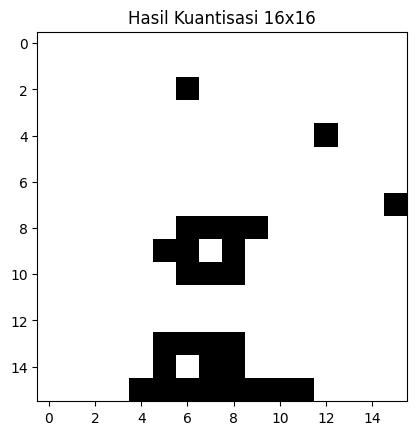

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk kuantisasi pada grid 32x32
def kuantisasi_grid(image_path):
    # Baca gambar dalam skala abu-abu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Ubah ukuran gambar menjadi 32x32 grid
    height, width = image.shape
    block_size_h = height // 16
    block_size_w = width // 16

    # Array hasil kuantisasi (0 untuk putih, 1 untuk hitam)
    kuantisasi = np.zeros((16, 16), dtype=int)

    # Proses setiap blok kecil 32x32
    for i in range(16):
        for j in range(16):
            # Ambil blok kecil
            block = image[i*block_size_h:(i+1)*block_size_h, j*block_size_w:(j+1)*block_size_w]

            # Hitung jumlah pixel putih dan hitam pada blok
            total_pixels = block_size_h * block_size_w
            white_pixels = np.sum(block > 127)  # Pixel lebih dari 127 dianggap putih
            black_pixels = total_pixels - white_pixels  # Pixel lainnya dianggap hitam

            # Tentukan kuantisasi berdasarkan mayoritas
            if black_pixels > white_pixels:
                kuantisasi[i, j] = 1  # Hitam
            else:
                kuantisasi[i, j] = 0  # Putih

    return kuantisasi

# Path gambar yang akan diproses
image_path = 'Bunga Putih.jpeg'

# Panggil fungsi kuantisasi dan cetak hasilnya
hasil_kuantisasi = kuantisasi_grid(image_path)

# Cetak hasil kuantisasi 32x32 sebagai angka 1 dan 0
for row in hasil_kuantisasi:
    print(' '.join(map(str, row)))

# Tampilkan hasil kuantisasi sebagai gambar
plt.imshow(hasil_kuantisasi, cmap='gray', interpolation='nearest')
plt.title('Hasil Kuantisasi 16x16')
plt.show()


In [3]:
from PIL import Image

def convert_to_grayscale(image_path, output_path):
    # Baca gambar dari file
    img = Image.open(image_path)
    
    # Konversi gambar ke grayscale
    grayscale_img = img.convert('L')
    
    # Simpan gambar grayscale
    grayscale_img.save(output_path)

    print(f"Gambar telah dikonversi ke grayscale dan disimpan sebagai '{output_path}'")

# Contoh penggunaan
input_image_path = 'C:/Pemrosesan Citra/Reva2.jpeg'  # Ganti dengan path gambar Anda
output_image_path = 'C:/Pemrosesan Citra/Reva_g2.jpeg'  # Path untuk gambar grayscale yang akan disimpan

convert_to_grayscale(input_image_path, output_image_path)


Gambar telah dikonversi ke grayscale dan disimpan sebagai 'C:/Pemrosesan Citra/Reva_g2.jpeg'
